In [24]:
import os
import glob
import json
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from cv2 import CascadeClassifier
from tqdm import tqdm

BATCH_SIZE = 1
N_FRAMES = 5

TRAIN_DIR = '../data/train_sample_videos/'

import mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt



In [25]:
# Source: https://www.kaggle.com/timesler/facial-recognition-model-in-pytorch
class DetectionPipeline:
    """Pipeline class for detecting faces in the frames of a video file."""
    
    def __init__(self, detector, n_frames=None, batch_size=60, resize=None):
        """Constructor for DetectionPipeline class.
        
        Keyword Arguments:
            n_frames {int} -- Total number of frames to load. These will be evenly spaced
                throughout the video. If not specified (i.e., None), all frames will be loaded.
                (default: {None})
            batch_size {int} -- Batch size to use with MTCNN face detector. (default: {32})
            resize {float} -- Fraction by which to resize frames from original prior to face
                detection. A value less than 1 results in downsampling and a value greater than
                1 result in upsampling. (default: {None})
        """
        self.detector = detector
        self.n_frames = n_frames
        self.batch_size = batch_size
        self.resize = resize
    
    def __call__(self, filename):
        """Load frames from an MP4 video and detect faces.

        Arguments:
            filename {str} -- Path to video.
        """
        # Create video reader and find length
        v_cap = cv2.VideoCapture(filename)
        v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Pick 'n_frames' evenly spaced frames to sample
        if self.n_frames is None:
            sample = np.arange(0, v_len)
        else:
            sample = np.linspace(0, v_len - 1, self.n_frames).astype(int)
        print(v_len)
        # Loop through frames
        faces = []
        frames = []
        for j in range(v_len):
            success = v_cap.grab()
            if j in sample:
                # Load frame
                success, frame = v_cap.retrieve()
                if not success:
                    continue
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(frame)              

                # When batch is full, detect faces and reset frame list
                for frame in frames:
                    face = []
                    face.extend(self.detector.detect_faces(frame))
                    print('number of face %d in a frame'%(len(face)))
                    resized_faces = self.draw_faces(frame, face)
                    faces.extend(resized_faces)
                frames = []
        v_cap.release()
        return faces
    
    def draw_faces(self, image, result_list):
    # load the image
        #data = plt.imread(filename)
        # plot each face as a subplot
        faces = []
        for i in range(len(result_list)):
            # get coordinates
            x1, y1, width, height = result_list[i]['box']
            x2, y2 = x1 + width, y1 + height
            plt.subplot(1, len(result_list), i+1)
            plt.axis('off')
            face = image[y1:y2, x1:x2]
            face = cv2.resize(face, (299,299))
            faces.append(face)
        return faces

In [26]:
# Load face detector
face_detector = MTCNN()


# Define face detection pipeline
detection_pipeline = DetectionPipeline(detector=face_detector, n_frames=N_FRAMES, batch_size=BATCH_SIZE)

In [27]:
# Get the paths of all train videos
all_train_videos = glob.glob(os.path.join(TRAIN_DIR, '*.mp4'))

# Get path of metadata.json
metadata_path = TRAIN_DIR + 'metadata.json'

# Get metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)
df = pd.DataFrame(columns=['filename', 'distance', 'label'])

  0%|          | 0/400 [00:00<?, ?it/s]

../data/train_sample_videos/cdaxixbosp.mp4
cdaxixbosp.mp4
300
number of face 1 in a frame
number of face 1 in a frame


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


number of face 1 in a frame
number of face 1 in a frame


  0%|          | 1/400 [00:04<30:44,  4.62s/it]

number of face 1 in a frame
../data/train_sample_videos/btiysiskpf.mp4
btiysiskpf.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


  0%|          | 2/400 [00:08<28:44,  4.33s/it]

number of face 2 in a frame
../data/train_sample_videos/clihsshdkq.mp4
clihsshdkq.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


  1%|          | 3/400 [00:12<27:44,  4.19s/it]

number of face 1 in a frame
../data/train_sample_videos/alvgwypubw.mp4
alvgwypubw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  1%|          | 4/400 [00:15<26:30,  4.02s/it]

number of face 1 in a frame
../data/train_sample_videos/eqvuznuwsa.mp4
eqvuznuwsa.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  1%|▏         | 5/400 [00:18<24:49,  3.77s/it]

number of face 1 in a frame
../data/train_sample_videos/eudeqjhdfd.mp4
eudeqjhdfd.mp4
300
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


  2%|▏         | 6/400 [00:23<26:23,  4.02s/it]

number of face 3 in a frame
../data/train_sample_videos/eeyhxisdfh.mp4
eeyhxisdfh.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  2%|▏         | 7/400 [00:27<25:26,  3.88s/it]

number of face 1 in a frame
../data/train_sample_videos/cizlkenljw.mp4
cizlkenljw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  2%|▏         | 8/400 [00:30<24:34,  3.76s/it]

number of face 1 in a frame
../data/train_sample_videos/bndybcqhfr.mp4
bndybcqhfr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  2%|▏         | 9/400 [00:34<25:03,  3.84s/it]

number of face 1 in a frame
../data/train_sample_videos/cuzrgrbvil.mp4
cuzrgrbvil.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


  2%|▎         | 10/400 [00:38<24:22,  3.75s/it]

number of face 1 in a frame
../data/train_sample_videos/atyntldecu.mp4
atyntldecu.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  3%|▎         | 11/400 [00:41<23:59,  3.70s/it]

number of face 1 in a frame
../data/train_sample_videos/bggsurpgpr.mp4
bggsurpgpr.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


  3%|▎         | 12/400 [00:45<24:01,  3.72s/it]

number of face 1 in a frame
../data/train_sample_videos/eckvhdusax.mp4
eckvhdusax.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  3%|▎         | 13/400 [00:49<24:05,  3.73s/it]

number of face 1 in a frame
../data/train_sample_videos/dvakowbgbt.mp4
dvakowbgbt.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  4%|▎         | 14/400 [00:53<25:05,  3.90s/it]

number of face 1 in a frame
../data/train_sample_videos/dqqtjcryjv.mp4
dqqtjcryjv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


  4%|▍         | 15/400 [00:57<24:59,  3.89s/it]

number of face 1 in a frame
../data/train_sample_videos/djvutyvaio.mp4
djvutyvaio.mp4
300
number of face 0 in a frame
number of face 1 in a frame
number of face 0 in a frame
number of face 1 in a frame


  4%|▍         | 16/400 [01:00<23:16,  3.64s/it]

number of face 0 in a frame
../data/train_sample_videos/dzwkmcwkwl.mp4
dzwkmcwkwl.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  4%|▍         | 17/400 [01:04<23:49,  3.73s/it]

number of face 1 in a frame
../data/train_sample_videos/bpapbctoao.mp4
bpapbctoao.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  4%|▍         | 18/400 [01:08<25:12,  3.96s/it]

number of face 1 in a frame
../data/train_sample_videos/aettqgevhz.mp4
aettqgevhz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  5%|▍         | 19/400 [01:12<25:04,  3.95s/it]

number of face 2 in a frame
../data/train_sample_videos/bbhtdfuqxq.mp4
bbhtdfuqxq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  5%|▌         | 20/400 [01:16<23:46,  3.75s/it]

number of face 1 in a frame
../data/train_sample_videos/caifxvsozs.mp4
caifxvsozs.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


  5%|▌         | 21/400 [01:19<23:12,  3.67s/it]

number of face 2 in a frame
../data/train_sample_videos/bgaogsjehq.mp4
bgaogsjehq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  6%|▌         | 22/400 [01:22<22:14,  3.53s/it]

number of face 1 in a frame
../data/train_sample_videos/agqphdxmwt.mp4
agqphdxmwt.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  6%|▌         | 23/400 [01:26<21:49,  3.47s/it]

number of face 1 in a frame
../data/train_sample_videos/ebywfrmhtd.mp4
ebywfrmhtd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  6%|▌         | 24/400 [01:29<21:57,  3.50s/it]

number of face 1 in a frame
../data/train_sample_videos/bsqgziaylx.mp4
bsqgziaylx.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


  6%|▋         | 25/400 [01:33<22:52,  3.66s/it]

number of face 3 in a frame
../data/train_sample_videos/ciyoudyhly.mp4
ciyoudyhly.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


  6%|▋         | 26/400 [01:37<23:00,  3.69s/it]

number of face 2 in a frame
../data/train_sample_videos/bxzakyopjf.mp4
bxzakyopjf.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  7%|▋         | 27/400 [01:41<23:28,  3.78s/it]

number of face 1 in a frame
../data/train_sample_videos/cknyxaqouy.mp4
cknyxaqouy.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


  7%|▋         | 28/400 [01:45<23:17,  3.76s/it]

number of face 1 in a frame
../data/train_sample_videos/avnqydkqjj.mp4
avnqydkqjj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  7%|▋         | 29/400 [01:48<22:49,  3.69s/it]

number of face 1 in a frame
../data/train_sample_videos/dakiztgtnw.mp4
dakiztgtnw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  8%|▊         | 30/400 [01:52<22:21,  3.63s/it]

number of face 1 in a frame
../data/train_sample_videos/acifjvzvpm.mp4
acifjvzvpm.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  8%|▊         | 31/400 [01:55<21:42,  3.53s/it]

number of face 1 in a frame
../data/train_sample_videos/dofusvhnib.mp4
dofusvhnib.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  8%|▊         | 32/400 [01:59<21:48,  3.56s/it]

number of face 1 in a frame
../data/train_sample_videos/ahqqqilsxt.mp4
ahqqqilsxt.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


  8%|▊         | 33/400 [02:03<23:08,  3.78s/it]

number of face 1 in a frame
../data/train_sample_videos/avtycwsgyb.mp4
avtycwsgyb.mp4
300
number of face 1 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


  8%|▊         | 34/400 [02:06<22:12,  3.64s/it]

number of face 1 in a frame
../data/train_sample_videos/cvaksbpssm.mp4
cvaksbpssm.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


  9%|▉         | 35/400 [02:10<22:16,  3.66s/it]

number of face 1 in a frame
../data/train_sample_videos/brwrlczjvi.mp4
brwrlczjvi.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


  9%|▉         | 36/400 [02:14<22:57,  3.78s/it]

number of face 3 in a frame
../data/train_sample_videos/bgwmmujlmc.mp4
bgwmmujlmc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


  9%|▉         | 37/400 [02:18<22:42,  3.75s/it]

number of face 1 in a frame
../data/train_sample_videos/dhkwmjxwrn.mp4
dhkwmjxwrn.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 3 in a frame


 10%|▉         | 38/400 [02:21<22:39,  3.76s/it]

number of face 3 in a frame
../data/train_sample_videos/bmjmjmbglm.mp4
bmjmjmbglm.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 10%|▉         | 39/400 [02:25<22:25,  3.73s/it]

number of face 1 in a frame
../data/train_sample_videos/emgjphonqb.mp4
emgjphonqb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 10%|█         | 40/400 [02:29<22:38,  3.77s/it]

number of face 1 in a frame
../data/train_sample_videos/bzmdrafeex.mp4
bzmdrafeex.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 3 in a frame
number of face 3 in a frame


 10%|█         | 41/400 [02:33<23:27,  3.92s/it]

number of face 2 in a frame
../data/train_sample_videos/dsgpbgsrdm.mp4
dsgpbgsrdm.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 10%|█         | 42/400 [02:37<22:47,  3.82s/it]

number of face 1 in a frame
../data/train_sample_videos/afoovlsmtx.mp4
afoovlsmtx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 11%|█         | 43/400 [02:40<22:05,  3.71s/it]

number of face 1 in a frame
../data/train_sample_videos/ebeknhudxq.mp4
ebeknhudxq.mp4
300
number of face 1 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


 11%|█         | 44/400 [02:43<20:42,  3.49s/it]

number of face 1 in a frame
../data/train_sample_videos/ccfoszqabv.mp4
ccfoszqabv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 11%|█▏        | 45/400 [02:48<22:03,  3.73s/it]

number of face 1 in a frame
../data/train_sample_videos/dnexlwbcxq.mp4
dnexlwbcxq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 12%|█▏        | 46/400 [02:51<21:51,  3.70s/it]

number of face 1 in a frame
../data/train_sample_videos/ensyyivobf.mp4
ensyyivobf.mp4
300
number of face 3 in a frame
number of face 3 in a frame
number of face 3 in a frame
number of face 3 in a frame


 12%|█▏        | 47/400 [02:55<22:41,  3.86s/it]

number of face 3 in a frame
../data/train_sample_videos/apgjqzkoma.mp4
apgjqzkoma.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 12%|█▏        | 48/400 [02:59<21:59,  3.75s/it]

number of face 1 in a frame
../data/train_sample_videos/bqeiblbxtl.mp4
bqeiblbxtl.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 12%|█▏        | 49/400 [03:02<21:30,  3.68s/it]

number of face 1 in a frame
../data/train_sample_videos/eqjscdagiv.mp4
eqjscdagiv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 12%|█▎        | 50/400 [03:07<22:26,  3.85s/it]

number of face 1 in a frame
../data/train_sample_videos/ejkqesyvam.mp4
ejkqesyvam.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 13%|█▎        | 51/400 [03:10<21:51,  3.76s/it]

number of face 1 in a frame
../data/train_sample_videos/bilnggbxgu.mp4
bilnggbxgu.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 13%|█▎        | 52/400 [03:14<21:05,  3.64s/it]

number of face 1 in a frame
../data/train_sample_videos/bulkxhhknf.mp4
bulkxhhknf.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame


 13%|█▎        | 53/400 [03:18<22:43,  3.93s/it]

number of face 2 in a frame
../data/train_sample_videos/cdphtzqrvp.mp4
cdphtzqrvp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 14%|█▎        | 54/400 [03:22<22:04,  3.83s/it]

number of face 1 in a frame
../data/train_sample_videos/cmxcfkrjiv.mp4
cmxcfkrjiv.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 5 in a frame
number of face 2 in a frame


 14%|█▍        | 55/400 [03:26<21:58,  3.82s/it]

number of face 2 in a frame
../data/train_sample_videos/cwsbspfzck.mp4
cwsbspfzck.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 14%|█▍        | 56/400 [03:29<21:49,  3.81s/it]

number of face 1 in a frame
../data/train_sample_videos/bsfmwclnqy.mp4
bsfmwclnqy.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 14%|█▍        | 57/400 [03:33<21:15,  3.72s/it]

number of face 1 in a frame
../data/train_sample_videos/ajqslcypsw.mp4
ajqslcypsw.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 14%|█▍        | 58/400 [03:36<20:54,  3.67s/it]

number of face 1 in a frame
../data/train_sample_videos/eebrkicpry.mp4
eebrkicpry.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 15%|█▍        | 59/400 [03:40<20:34,  3.62s/it]

number of face 1 in a frame
../data/train_sample_videos/aklqzsddfl.mp4
aklqzsddfl.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 15%|█▌        | 60/400 [03:44<20:25,  3.60s/it]

number of face 1 in a frame
../data/train_sample_videos/aqpnvjhuzw.mp4
aqpnvjhuzw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 15%|█▌        | 61/400 [03:47<20:30,  3.63s/it]

number of face 1 in a frame
../data/train_sample_videos/bvzjkezkms.mp4
bvzjkezkms.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 16%|█▌        | 62/400 [03:51<20:16,  3.60s/it]

number of face 1 in a frame
../data/train_sample_videos/bmhvktyiwp.mp4
bmhvktyiwp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 16%|█▌        | 63/400 [03:54<20:06,  3.58s/it]

number of face 1 in a frame
../data/train_sample_videos/acxnxvbsxk.mp4
acxnxvbsxk.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 16%|█▌        | 64/400 [03:58<20:12,  3.61s/it]

number of face 1 in a frame
../data/train_sample_videos/cyboodqqyr.mp4
cyboodqqyr.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


 16%|█▋        | 65/400 [04:02<20:07,  3.61s/it]

number of face 1 in a frame
../data/train_sample_videos/czkdanyadc.mp4
czkdanyadc.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 16%|█▋        | 66/400 [04:05<20:10,  3.63s/it]

number of face 1 in a frame
../data/train_sample_videos/esgftaficx.mp4
esgftaficx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 17%|█▋        | 67/400 [04:09<19:48,  3.57s/it]

number of face 1 in a frame
../data/train_sample_videos/aagfhgtpmv.mp4
aagfhgtpmv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 17%|█▋        | 68/400 [04:13<20:42,  3.74s/it]

number of face 1 in a frame
../data/train_sample_videos/bmbbkwmxqj.mp4
bmbbkwmxqj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 17%|█▋        | 69/400 [04:16<20:03,  3.64s/it]

number of face 1 in a frame
../data/train_sample_videos/dqnyszdong.mp4
dqnyszdong.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 0 in a frame


 18%|█▊        | 70/400 [04:19<18:59,  3.45s/it]

number of face 0 in a frame
../data/train_sample_videos/btunxncpjh.mp4
btunxncpjh.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 18%|█▊        | 71/400 [04:23<18:47,  3.43s/it]

number of face 1 in a frame
../data/train_sample_videos/bnbuonyoje.mp4
bnbuonyoje.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 18%|█▊        | 72/400 [04:26<18:40,  3.42s/it]

number of face 1 in a frame
../data/train_sample_videos/bhpwpydzpo.mp4
bhpwpydzpo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 18%|█▊        | 73/400 [04:30<18:58,  3.48s/it]

number of face 1 in a frame
../data/train_sample_videos/bbvgxeczei.mp4
bbvgxeczei.mp4
300
number of face 1 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


 18%|█▊        | 74/400 [04:33<18:10,  3.35s/it]

number of face 0 in a frame
../data/train_sample_videos/apogckdfrz.mp4
apogckdfrz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 19%|█▉        | 75/400 [04:36<18:40,  3.45s/it]

number of face 1 in a frame
../data/train_sample_videos/esnntzzajv.mp4
esnntzzajv.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 19%|█▉        | 76/400 [04:41<20:44,  3.84s/it]

number of face 1 in a frame
../data/train_sample_videos/chzieimrwu.mp4
chzieimrwu.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 19%|█▉        | 77/400 [04:46<22:14,  4.13s/it]

number of face 1 in a frame
../data/train_sample_videos/dhcndnuwta.mp4
dhcndnuwta.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 3 in a frame


 20%|█▉        | 78/400 [04:50<22:23,  4.17s/it]

number of face 2 in a frame
../data/train_sample_videos/awukslzjra.mp4
awukslzjra.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 20%|█▉        | 79/400 [04:54<21:34,  4.03s/it]

number of face 1 in a frame
../data/train_sample_videos/amowujxmzc.mp4
amowujxmzc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 20%|██        | 80/400 [04:57<20:37,  3.87s/it]

number of face 1 in a frame
../data/train_sample_videos/dbhoxkblzx.mp4
dbhoxkblzx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 20%|██        | 81/400 [05:01<20:15,  3.81s/it]

number of face 1 in a frame
../data/train_sample_videos/akvmwkdyuv.mp4
akvmwkdyuv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 20%|██        | 82/400 [05:05<20:58,  3.96s/it]

number of face 1 in a frame
../data/train_sample_videos/bqnymlsayl.mp4
bqnymlsayl.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 21%|██        | 83/400 [05:09<21:01,  3.98s/it]

number of face 2 in a frame
../data/train_sample_videos/aevrfsexku.mp4
aevrfsexku.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 21%|██        | 84/400 [05:13<20:05,  3.81s/it]

number of face 1 in a frame
../data/train_sample_videos/abqwwspghj.mp4
abqwwspghj.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 21%|██▏       | 85/400 [05:16<19:39,  3.74s/it]

number of face 1 in a frame
../data/train_sample_videos/byofowlkki.mp4
byofowlkki.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 22%|██▏       | 86/400 [05:20<19:57,  3.81s/it]

number of face 1 in a frame
../data/train_sample_videos/cycacemkmt.mp4
cycacemkmt.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 0 in a frame


 22%|██▏       | 87/400 [05:23<18:43,  3.59s/it]

number of face 1 in a frame
../data/train_sample_videos/arkroixhey.mp4
arkroixhey.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 22%|██▏       | 88/400 [05:27<18:19,  3.53s/it]

number of face 1 in a frame
../data/train_sample_videos/asmpfjfzif.mp4
asmpfjfzif.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 22%|██▏       | 89/400 [05:30<17:52,  3.45s/it]

number of face 1 in a frame
../data/train_sample_videos/eprybmbpba.mp4
eprybmbpba.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 22%|██▎       | 90/400 [05:34<17:53,  3.46s/it]

number of face 1 in a frame
../data/train_sample_videos/btugrnoton.mp4
btugrnoton.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 23%|██▎       | 91/400 [05:37<17:52,  3.47s/it]

number of face 1 in a frame
../data/train_sample_videos/bwipwzzxxu.mp4
bwipwzzxxu.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 23%|██▎       | 92/400 [05:41<18:08,  3.53s/it]

number of face 1 in a frame
../data/train_sample_videos/cwwandrkus.mp4
cwwandrkus.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 23%|██▎       | 93/400 [05:45<18:51,  3.69s/it]

number of face 1 in a frame
../data/train_sample_videos/emaalmsonj.mp4
emaalmsonj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 24%|██▎       | 94/400 [05:48<18:11,  3.57s/it]

number of face 1 in a frame
../data/train_sample_videos/bqkdbcqjvb.mp4
bqkdbcqjvb.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame


 24%|██▍       | 95/400 [05:51<17:21,  3.42s/it]

number of face 1 in a frame
../data/train_sample_videos/aytzyidmgs.mp4
aytzyidmgs.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 24%|██▍       | 96/400 [05:55<17:22,  3.43s/it]

number of face 1 in a frame
../data/train_sample_videos/avssvvsdhz.mp4
avssvvsdhz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 24%|██▍       | 97/400 [05:58<17:37,  3.49s/it]

number of face 1 in a frame
../data/train_sample_videos/avibnnhwhp.mp4
avibnnhwhp.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 24%|██▍       | 98/400 [06:02<18:08,  3.61s/it]

number of face 2 in a frame
../data/train_sample_videos/bchnbulevv.mp4
bchnbulevv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 25%|██▍       | 99/400 [06:06<17:51,  3.56s/it]

number of face 1 in a frame
../data/train_sample_videos/btohlidmru.mp4
btohlidmru.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 25%|██▌       | 100/400 [06:09<17:27,  3.49s/it]

number of face 1 in a frame
../data/train_sample_videos/elginszwtk.mp4
elginszwtk.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 25%|██▌       | 101/400 [06:12<17:23,  3.49s/it]

number of face 1 in a frame
../data/train_sample_videos/augtsuxpzc.mp4
augtsuxpzc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 26%|██▌       | 102/400 [06:16<18:17,  3.68s/it]

number of face 1 in a frame
../data/train_sample_videos/andaxzscny.mp4
andaxzscny.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


 26%|██▌       | 103/400 [06:20<17:19,  3.50s/it]

number of face 0 in a frame
../data/train_sample_videos/dulanfulol.mp4
dulanfulol.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 26%|██▌       | 104/400 [06:23<17:33,  3.56s/it]

number of face 1 in a frame
../data/train_sample_videos/crktehraph.mp4
crktehraph.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 26%|██▋       | 105/400 [06:27<18:11,  3.70s/it]

number of face 1 in a frame
../data/train_sample_videos/alninxcyhg.mp4
alninxcyhg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 26%|██▋       | 106/400 [06:31<17:58,  3.67s/it]

number of face 1 in a frame
../data/train_sample_videos/ecujsjhscd.mp4
ecujsjhscd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 27%|██▋       | 107/400 [06:34<17:36,  3.61s/it]

number of face 1 in a frame
../data/train_sample_videos/bwuwstvsbw.mp4
bwuwstvsbw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 27%|██▋       | 108/400 [06:38<17:15,  3.55s/it]

number of face 1 in a frame
../data/train_sample_videos/doanjploai.mp4
doanjploai.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 27%|██▋       | 109/400 [06:41<17:15,  3.56s/it]

number of face 1 in a frame
../data/train_sample_videos/aelzhcnwgf.mp4
aelzhcnwgf.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 28%|██▊       | 110/400 [06:45<17:10,  3.55s/it]

number of face 1 in a frame
../data/train_sample_videos/efdyrflcpg.mp4
efdyrflcpg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 28%|██▊       | 111/400 [06:49<17:25,  3.62s/it]

number of face 1 in a frame
../data/train_sample_videos/aknbdpmgua.mp4
aknbdpmgua.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 28%|██▊       | 112/400 [06:52<17:17,  3.60s/it]

number of face 1 in a frame
../data/train_sample_videos/agrmhtjdlk.mp4
agrmhtjdlk.mp4
300
number of face 0 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 28%|██▊       | 113/400 [06:56<17:22,  3.63s/it]

number of face 2 in a frame
../data/train_sample_videos/aapnvogymq.mp4
aapnvogymq.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 28%|██▊       | 114/400 [07:00<17:40,  3.71s/it]

number of face 2 in a frame
../data/train_sample_videos/edyncaijwx.mp4
edyncaijwx.mp4
300
number of face 3 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 29%|██▉       | 115/400 [07:04<18:28,  3.89s/it]

number of face 2 in a frame
../data/train_sample_videos/bweezhfpzp.mp4
bweezhfpzp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 29%|██▉       | 116/400 [07:08<18:13,  3.85s/it]

number of face 1 in a frame
../data/train_sample_videos/avywawptfc.mp4
avywawptfc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 29%|██▉       | 117/400 [07:11<17:44,  3.76s/it]

number of face 1 in a frame
../data/train_sample_videos/brvqtabyxj.mp4
brvqtabyxj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 30%|██▉       | 118/400 [07:15<17:33,  3.73s/it]

number of face 1 in a frame
../data/train_sample_videos/cpjxareypw.mp4
cpjxareypw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 30%|██▉       | 119/400 [07:19<17:03,  3.64s/it]

number of face 1 in a frame
../data/train_sample_videos/cobjrlugvp.mp4
cobjrlugvp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 30%|███       | 120/400 [07:22<16:37,  3.56s/it]

number of face 1 in a frame
../data/train_sample_videos/ehtdtkmmli.mp4
ehtdtkmmli.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 30%|███       | 121/400 [07:26<16:43,  3.60s/it]

number of face 1 in a frame
../data/train_sample_videos/eajlrktemq.mp4
eajlrktemq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 30%|███       | 122/400 [07:29<16:29,  3.56s/it]

number of face 1 in a frame
../data/train_sample_videos/aknmpoonls.mp4
aknmpoonls.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 31%|███       | 123/400 [07:33<16:38,  3.60s/it]

number of face 1 in a frame
../data/train_sample_videos/ceymbecxnj.mp4
ceymbecxnj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 31%|███       | 124/400 [07:36<16:08,  3.51s/it]

number of face 1 in a frame
../data/train_sample_videos/agdkmztvby.mp4
agdkmztvby.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 31%|███▏      | 125/400 [07:40<16:24,  3.58s/it]

number of face 1 in a frame
../data/train_sample_videos/aczrgyricp.mp4
aczrgyricp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 32%|███▏      | 126/400 [07:44<16:51,  3.69s/it]

number of face 1 in a frame
../data/train_sample_videos/ebebgmtlcu.mp4
ebebgmtlcu.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 32%|███▏      | 127/400 [07:47<16:41,  3.67s/it]

number of face 1 in a frame
../data/train_sample_videos/btmsngnqhv.mp4
btmsngnqhv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 32%|███▏      | 128/400 [07:52<17:27,  3.85s/it]

number of face 1 in a frame
../data/train_sample_videos/btjlfpzbdu.mp4
btjlfpzbdu.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 32%|███▏      | 129/400 [07:56<17:33,  3.89s/it]

number of face 1 in a frame
../data/train_sample_videos/crzfebnfgb.mp4
crzfebnfgb.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 32%|███▎      | 130/400 [07:59<17:04,  3.79s/it]

number of face 1 in a frame
../data/train_sample_videos/dcamvmuors.mp4
dcamvmuors.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 33%|███▎      | 131/400 [08:03<16:43,  3.73s/it]

number of face 1 in a frame
../data/train_sample_videos/bntlodcfeg.mp4
bntlodcfeg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 33%|███▎      | 132/400 [08:07<16:58,  3.80s/it]

number of face 2 in a frame
../data/train_sample_videos/abofeumbvv.mp4
abofeumbvv.mp4
300
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 33%|███▎      | 133/400 [08:14<21:16,  4.78s/it]

number of face 1 in a frame
../data/train_sample_videos/dcuiiorugd.mp4
dcuiiorugd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 34%|███▎      | 134/400 [08:19<22:04,  4.98s/it]

number of face 1 in a frame
../data/train_sample_videos/axczxisdtb.mp4
axczxisdtb.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 34%|███▍      | 135/400 [08:23<21:00,  4.76s/it]

number of face 1 in a frame
../data/train_sample_videos/cwrtyzndpx.mp4
cwrtyzndpx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 34%|███▍      | 136/400 [08:27<19:35,  4.45s/it]

number of face 1 in a frame
../data/train_sample_videos/anpuvshzoo.mp4
anpuvshzoo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 34%|███▍      | 137/400 [08:31<18:38,  4.25s/it]

number of face 1 in a frame
../data/train_sample_videos/czfunozvwp.mp4
czfunozvwp.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 3 in a frame


 34%|███▍      | 138/400 [08:35<18:01,  4.13s/it]

number of face 2 in a frame
../data/train_sample_videos/bmehkyanbj.mp4
bmehkyanbj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 35%|███▍      | 139/400 [08:38<17:12,  3.96s/it]

number of face 1 in a frame
../data/train_sample_videos/eukvucdetx.mp4
eukvucdetx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 35%|███▌      | 140/400 [08:42<16:30,  3.81s/it]

number of face 1 in a frame
../data/train_sample_videos/cqhngvpgyi.mp4
cqhngvpgyi.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 35%|███▌      | 141/400 [08:46<16:48,  3.89s/it]

number of face 2 in a frame
../data/train_sample_videos/cwbacdwrzo.mp4
cwbacdwrzo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 36%|███▌      | 142/400 [08:50<17:04,  3.97s/it]

number of face 2 in a frame
../data/train_sample_videos/bguwlyazau.mp4
bguwlyazau.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 36%|███▌      | 143/400 [08:55<17:39,  4.12s/it]

number of face 2 in a frame
../data/train_sample_videos/byyqectxqa.mp4
byyqectxqa.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 36%|███▌      | 144/400 [08:58<17:01,  3.99s/it]

number of face 1 in a frame
../data/train_sample_videos/bahdpoesir.mp4
bahdpoesir.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 36%|███▋      | 145/400 [09:03<17:27,  4.11s/it]

number of face 1 in a frame
../data/train_sample_videos/dgxrqjdomn.mp4
dgxrqjdomn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 36%|███▋      | 146/400 [09:06<16:48,  3.97s/it]

number of face 2 in a frame
../data/train_sample_videos/ctzmavwror.mp4
ctzmavwror.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 37%|███▋      | 147/400 [09:10<16:25,  3.90s/it]

number of face 1 in a frame
../data/train_sample_videos/dkrvorliqc.mp4
dkrvorliqc.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 37%|███▋      | 148/400 [09:15<17:13,  4.10s/it]

number of face 2 in a frame
../data/train_sample_videos/etejaapnxh.mp4
etejaapnxh.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 37%|███▋      | 149/400 [09:19<17:12,  4.11s/it]

number of face 1 in a frame
../data/train_sample_videos/caqbrkogkb.mp4
caqbrkogkb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 38%|███▊      | 150/400 [09:22<16:33,  3.98s/it]

number of face 1 in a frame
../data/train_sample_videos/bkvetcojbt.mp4
bkvetcojbt.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 38%|███▊      | 151/400 [09:26<16:38,  4.01s/it]

number of face 1 in a frame
../data/train_sample_videos/bdxuhamuqx.mp4
bdxuhamuqx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 38%|███▊      | 152/400 [09:31<16:47,  4.06s/it]

number of face 1 in a frame
../data/train_sample_videos/bqtuuwzdtr.mp4
bqtuuwzdtr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 38%|███▊      | 153/400 [09:35<16:33,  4.02s/it]

number of face 1 in a frame
../data/train_sample_videos/bhsluedavd.mp4
bhsluedavd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 38%|███▊      | 154/400 [09:39<16:20,  3.99s/it]

number of face 1 in a frame
../data/train_sample_videos/cttqtsjvgn.mp4
cttqtsjvgn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 39%|███▉      | 155/400 [09:43<16:43,  4.09s/it]

number of face 1 in a frame
../data/train_sample_videos/covdcysmbi.mp4
covdcysmbi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 39%|███▉      | 156/400 [09:47<16:37,  4.09s/it]

number of face 1 in a frame
../data/train_sample_videos/cthdnahrkh.mp4
cthdnahrkh.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 39%|███▉      | 157/400 [09:51<16:55,  4.18s/it]

number of face 1 in a frame
../data/train_sample_videos/btjwbtsgln.mp4
btjwbtsgln.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 40%|███▉      | 158/400 [09:55<16:31,  4.10s/it]

number of face 1 in a frame
../data/train_sample_videos/axwovszumc.mp4
axwovszumc.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 3 in a frame


 40%|███▉      | 159/400 [09:59<16:24,  4.08s/it]

number of face 2 in a frame
../data/train_sample_videos/brhalypwoo.mp4
brhalypwoo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 40%|████      | 160/400 [10:03<16:04,  4.02s/it]

number of face 1 in a frame
../data/train_sample_videos/cffffbcywc.mp4
cffffbcywc.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 5 in a frame
number of face 3 in a frame


 40%|████      | 161/400 [10:08<16:28,  4.14s/it]

number of face 2 in a frame
../data/train_sample_videos/dzqwgqewhu.mp4
dzqwgqewhu.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 40%|████      | 162/400 [10:12<16:12,  4.09s/it]

number of face 1 in a frame
../data/train_sample_videos/adohikbdaz.mp4
adohikbdaz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 41%|████      | 163/400 [10:16<16:46,  4.25s/it]

number of face 1 in a frame
../data/train_sample_videos/adylbeequz.mp4
adylbeequz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 41%|████      | 164/400 [10:20<16:08,  4.11s/it]

number of face 1 in a frame
../data/train_sample_videos/eqnoqyfquo.mp4
eqnoqyfquo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 41%|████▏     | 165/400 [10:24<15:53,  4.06s/it]

number of face 1 in a frame
../data/train_sample_videos/dhevettufk.mp4
dhevettufk.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 42%|████▏     | 166/400 [10:29<17:32,  4.50s/it]

number of face 1 in a frame
../data/train_sample_videos/ebkzwjgjhq.mp4
ebkzwjgjhq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 42%|████▏     | 167/400 [10:33<16:43,  4.31s/it]

number of face 1 in a frame
../data/train_sample_videos/cqrskwiqng.mp4
cqrskwiqng.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 42%|████▏     | 168/400 [10:37<16:33,  4.28s/it]

number of face 1 in a frame
../data/train_sample_videos/eejswgycjc.mp4
eejswgycjc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 42%|████▏     | 169/400 [10:41<16:05,  4.18s/it]

number of face 1 in a frame
../data/train_sample_videos/boovltmuwi.mp4
boovltmuwi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 42%|████▎     | 170/400 [10:46<15:57,  4.16s/it]

number of face 1 in a frame
../data/train_sample_videos/cwqlvzefpg.mp4
cwqlvzefpg.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame


 43%|████▎     | 171/400 [10:49<15:03,  3.95s/it]

number of face 0 in a frame
../data/train_sample_videos/aorjvbyxhw.mp4
aorjvbyxhw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 3 in a frame


 43%|████▎     | 172/400 [10:56<18:03,  4.75s/it]

number of face 1 in a frame
../data/train_sample_videos/ecnihjlfyt.mp4
ecnihjlfyt.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 43%|████▎     | 173/400 [11:00<17:53,  4.73s/it]

number of face 1 in a frame
../data/train_sample_videos/avfitoutyn.mp4
avfitoutyn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 44%|████▎     | 174/400 [11:06<18:35,  4.93s/it]

number of face 1 in a frame
../data/train_sample_videos/eahlqmfvtj.mp4
eahlqmfvtj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 44%|████▍     | 175/400 [11:14<22:17,  5.94s/it]

number of face 1 in a frame
../data/train_sample_videos/adhsbajydo.mp4
adhsbajydo.mp4
300
number of face 1 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


 44%|████▍     | 176/400 [11:19<20:59,  5.62s/it]

number of face 0 in a frame
../data/train_sample_videos/ehfiekigla.mp4
ehfiekigla.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 44%|████▍     | 177/400 [11:24<20:25,  5.50s/it]

number of face 1 in a frame
../data/train_sample_videos/bdnaqemxmr.mp4
bdnaqemxmr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 44%|████▍     | 178/400 [11:29<20:01,  5.41s/it]

number of face 1 in a frame
../data/train_sample_videos/asvcrfdpnq.mp4
asvcrfdpnq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 45%|████▍     | 179/400 [11:34<19:15,  5.23s/it]

number of face 1 in a frame
../data/train_sample_videos/chtapglbcj.mp4
chtapglbcj.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 45%|████▌     | 180/400 [11:39<18:53,  5.15s/it]

number of face 1 in a frame
../data/train_sample_videos/bourlmzsio.mp4
bourlmzsio.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 45%|████▌     | 181/400 [11:44<18:16,  5.01s/it]

number of face 1 in a frame
../data/train_sample_videos/etmcruaihe.mp4
etmcruaihe.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 46%|████▌     | 182/400 [11:48<17:10,  4.73s/it]

number of face 1 in a frame
../data/train_sample_videos/acxwigylke.mp4
acxwigylke.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 46%|████▌     | 183/400 [11:54<18:19,  5.07s/it]

number of face 1 in a frame
../data/train_sample_videos/atkdltyyen.mp4
atkdltyyen.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 46%|████▌     | 184/400 [11:58<17:51,  4.96s/it]

number of face 1 in a frame
../data/train_sample_videos/dbhrpizyeq.mp4
dbhrpizyeq.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 46%|████▋     | 185/400 [12:04<18:32,  5.18s/it]

number of face 1 in a frame
../data/train_sample_videos/ccmonzqfrz.mp4
ccmonzqfrz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 46%|████▋     | 186/400 [12:10<19:03,  5.34s/it]

number of face 1 in a frame
../data/train_sample_videos/ahbweevwpv.mp4
ahbweevwpv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 47%|████▋     | 187/400 [12:15<19:10,  5.40s/it]

number of face 1 in a frame
../data/train_sample_videos/dntkzzzcdh.mp4
dntkzzzcdh.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 47%|████▋     | 188/400 [12:20<18:32,  5.25s/it]

number of face 1 in a frame
../data/train_sample_videos/bbhpvrmbse.mp4
bbhpvrmbse.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 47%|████▋     | 189/400 [12:26<19:00,  5.41s/it]

number of face 2 in a frame
../data/train_sample_videos/dakqwktlbi.mp4
dakqwktlbi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 0 in a frame


 48%|████▊     | 190/400 [12:30<17:48,  5.09s/it]

number of face 1 in a frame
../data/train_sample_videos/benmsfzfaz.mp4
benmsfzfaz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 48%|████▊     | 191/400 [12:35<17:19,  4.97s/it]

number of face 1 in a frame
../data/train_sample_videos/etdcqxabww.mp4
etdcqxabww.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 48%|████▊     | 192/400 [12:40<16:51,  4.87s/it]

number of face 1 in a frame
../data/train_sample_videos/atxvxouljq.mp4
atxvxouljq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 48%|████▊     | 193/400 [12:46<17:55,  5.20s/it]

number of face 1 in a frame
../data/train_sample_videos/cgvrgibpfo.mp4
cgvrgibpfo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 48%|████▊     | 194/400 [12:50<17:25,  5.07s/it]

number of face 1 in a frame
../data/train_sample_videos/bghphrsfxf.mp4
bghphrsfxf.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 49%|████▉     | 195/400 [12:55<17:00,  4.98s/it]

number of face 1 in a frame
../data/train_sample_videos/blzydqdfem.mp4
blzydqdfem.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 49%|████▉     | 196/400 [13:01<17:41,  5.20s/it]

number of face 1 in a frame
../data/train_sample_videos/etohcvnzbj.mp4
etohcvnzbj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 49%|████▉     | 197/400 [13:07<18:36,  5.50s/it]

number of face 1 in a frame
../data/train_sample_videos/cmbzllswnl.mp4
cmbzllswnl.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 50%|████▉     | 198/400 [13:14<19:46,  5.88s/it]

number of face 1 in a frame
../data/train_sample_videos/cnilkgvfei.mp4
cnilkgvfei.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 50%|████▉     | 199/400 [13:24<24:17,  7.25s/it]

number of face 1 in a frame
../data/train_sample_videos/duzuusuajr.mp4
duzuusuajr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 50%|█████     | 200/400 [13:31<23:21,  7.01s/it]

number of face 1 in a frame
../data/train_sample_videos/asaxgevnnp.mp4
asaxgevnnp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 50%|█████     | 201/400 [13:36<21:00,  6.34s/it]

number of face 1 in a frame
../data/train_sample_videos/egghxjjmfg.mp4
egghxjjmfg.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 50%|█████     | 202/400 [13:43<21:50,  6.62s/it]

number of face 1 in a frame
../data/train_sample_videos/bdgipnyobr.mp4
bdgipnyobr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 51%|█████     | 203/400 [13:48<19:59,  6.09s/it]

number of face 1 in a frame
../data/train_sample_videos/eepezmygaq.mp4
eepezmygaq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 51%|█████     | 204/400 [13:54<19:55,  6.10s/it]

number of face 1 in a frame
../data/train_sample_videos/curpwogllm.mp4
curpwogllm.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 51%|█████▏    | 205/400 [14:00<20:21,  6.26s/it]

number of face 1 in a frame
../data/train_sample_videos/diopzaywor.mp4
diopzaywor.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 52%|█████▏    | 206/400 [14:05<18:46,  5.81s/it]

number of face 1 in a frame
../data/train_sample_videos/chviwxsfhg.mp4
chviwxsfhg.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 52%|█████▏    | 207/400 [14:10<18:06,  5.63s/it]

number of face 3 in a frame
../data/train_sample_videos/bmjzrlszhi.mp4
bmjzrlszhi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 52%|█████▏    | 208/400 [14:15<16:51,  5.27s/it]

number of face 1 in a frame
../data/train_sample_videos/dwediigjit.mp4
dwediigjit.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 52%|█████▏    | 209/400 [14:19<15:55,  5.00s/it]

number of face 1 in a frame
../data/train_sample_videos/cyclgfjdrv.mp4
cyclgfjdrv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 0 in a frame


 52%|█████▎    | 210/400 [14:23<14:40,  4.64s/it]

number of face 1 in a frame
../data/train_sample_videos/cettndmvzl.mp4
cettndmvzl.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 53%|█████▎    | 211/400 [14:27<14:20,  4.55s/it]

number of face 1 in a frame
../data/train_sample_videos/ddhfabwpuz.mp4
ddhfabwpuz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 53%|█████▎    | 212/400 [14:32<14:07,  4.51s/it]

number of face 1 in a frame
../data/train_sample_videos/drgjzlxzxj.mp4
drgjzlxzxj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 53%|█████▎    | 213/400 [14:36<13:54,  4.46s/it]

number of face 1 in a frame
../data/train_sample_videos/dbtbbhakdv.mp4
dbtbbhakdv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 54%|█████▎    | 214/400 [14:42<15:01,  4.85s/it]

number of face 1 in a frame
../data/train_sample_videos/bjjbwsqjir.mp4
bjjbwsqjir.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 54%|█████▍    | 215/400 [14:46<14:40,  4.76s/it]

number of face 1 in a frame
../data/train_sample_videos/dsdoseflas.mp4
dsdoseflas.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 54%|█████▍    | 216/400 [14:51<14:04,  4.59s/it]

number of face 1 in a frame
../data/train_sample_videos/dsjbknkujw.mp4
dsjbknkujw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 54%|█████▍    | 217/400 [14:56<14:47,  4.85s/it]

number of face 2 in a frame
../data/train_sample_videos/dhjmzhrcav.mp4
dhjmzhrcav.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 55%|█████▍    | 218/400 [15:00<14:05,  4.64s/it]

number of face 1 in a frame
../data/train_sample_videos/dptbnjnkdg.mp4
dptbnjnkdg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 55%|█████▍    | 219/400 [15:05<13:45,  4.56s/it]

number of face 1 in a frame
../data/train_sample_videos/ddpvuimigj.mp4
ddpvuimigj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 55%|█████▌    | 220/400 [15:11<15:03,  5.02s/it]

number of face 1 in a frame
../data/train_sample_videos/byfenovjnf.mp4
byfenovjnf.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 55%|█████▌    | 221/400 [15:15<14:42,  4.93s/it]

number of face 1 in a frame
../data/train_sample_videos/asdpeebotb.mp4
asdpeebotb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 56%|█████▌    | 222/400 [15:20<14:34,  4.91s/it]

number of face 1 in a frame
../data/train_sample_videos/dptrzdvwpg.mp4
dptrzdvwpg.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 56%|█████▌    | 223/400 [15:25<14:02,  4.76s/it]

number of face 1 in a frame
../data/train_sample_videos/ehieahnhte.mp4
ehieahnhte.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 56%|█████▌    | 224/400 [15:29<13:32,  4.62s/it]

number of face 1 in a frame
../data/train_sample_videos/awnwkrqibf.mp4
awnwkrqibf.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 56%|█████▋    | 225/400 [15:34<13:50,  4.75s/it]

number of face 1 in a frame
../data/train_sample_videos/axoygtekut.mp4
axoygtekut.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 56%|█████▋    | 226/400 [15:41<15:42,  5.42s/it]

number of face 1 in a frame
../data/train_sample_videos/esxrvsgpvb.mp4
esxrvsgpvb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 57%|█████▋    | 227/400 [15:47<15:59,  5.55s/it]

number of face 1 in a frame
../data/train_sample_videos/bpxckdzddv.mp4
bpxckdzddv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 57%|█████▋    | 228/400 [15:52<15:12,  5.30s/it]

number of face 1 in a frame
../data/train_sample_videos/dzieklokdr.mp4
dzieklokdr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 57%|█████▋    | 229/400 [15:58<15:49,  5.55s/it]

number of face 1 in a frame
../data/train_sample_videos/dkdwxmtpuo.mp4
dkdwxmtpuo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 57%|█████▊    | 230/400 [16:04<15:57,  5.63s/it]

number of face 1 in a frame
../data/train_sample_videos/ckkuyewywx.mp4
ckkuyewywx.mp4
300
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 58%|█████▊    | 231/400 [16:09<16:04,  5.71s/it]

number of face 2 in a frame
../data/train_sample_videos/abarnvbtwb.mp4
abarnvbtwb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 58%|█████▊    | 232/400 [16:19<19:07,  6.83s/it]

number of face 1 in a frame
../data/train_sample_videos/bydaidkpdp.mp4
bydaidkpdp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 58%|█████▊    | 233/400 [16:27<20:04,  7.21s/it]

number of face 1 in a frame
../data/train_sample_videos/byijojkdba.mp4
byijojkdba.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 58%|█████▊    | 234/400 [16:37<21:54,  7.92s/it]

number of face 1 in a frame
../data/train_sample_videos/cglxirfaey.mp4
cglxirfaey.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 59%|█████▉    | 235/400 [16:42<19:56,  7.25s/it]

number of face 1 in a frame
../data/train_sample_videos/cxfujlvsuw.mp4
cxfujlvsuw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 59%|█████▉    | 236/400 [16:47<17:28,  6.39s/it]

number of face 1 in a frame
../data/train_sample_videos/dkuayagnmc.mp4
dkuayagnmc.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 59%|█████▉    | 237/400 [16:52<16:18,  6.00s/it]

number of face 1 in a frame
../data/train_sample_videos/duycddgtrl.mp4
duycddgtrl.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame


 60%|█████▉    | 238/400 [16:56<14:42,  5.45s/it]

number of face 2 in a frame
../data/train_sample_videos/ekcrtigpab.mp4
ekcrtigpab.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 60%|█████▉    | 239/400 [17:00<13:31,  5.04s/it]

number of face 1 in a frame
../data/train_sample_videos/amaivqofda.mp4
amaivqofda.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 60%|██████    | 240/400 [17:05<13:37,  5.11s/it]

number of face 1 in a frame
../data/train_sample_videos/ehdkmxgtxh.mp4
ehdkmxgtxh.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame


 60%|██████    | 241/400 [17:11<13:43,  5.18s/it]

number of face 2 in a frame
../data/train_sample_videos/byqzyxifza.mp4
byqzyxifza.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 60%|██████    | 242/400 [17:15<12:56,  4.92s/it]

number of face 1 in a frame
../data/train_sample_videos/diomeixhrg.mp4
diomeixhrg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 61%|██████    | 243/400 [17:19<12:24,  4.74s/it]

number of face 1 in a frame
../data/train_sample_videos/dxbqjxrhin.mp4
dxbqjxrhin.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 3 in a frame
number of face 2 in a frame


 61%|██████    | 244/400 [17:26<14:05,  5.42s/it]

number of face 2 in a frame
../data/train_sample_videos/beboztfcme.mp4
beboztfcme.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 61%|██████▏   | 245/400 [17:34<15:31,  6.01s/it]

number of face 1 in a frame
../data/train_sample_videos/coadfnerlk.mp4
coadfnerlk.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 62%|██████▏   | 246/400 [17:38<14:14,  5.55s/it]

number of face 2 in a frame
../data/train_sample_videos/drsakwyvqv.mp4
drsakwyvqv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 62%|██████▏   | 247/400 [17:43<13:24,  5.26s/it]

number of face 1 in a frame
../data/train_sample_videos/errocgcham.mp4
errocgcham.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 62%|██████▏   | 248/400 [17:47<12:48,  5.06s/it]

number of face 1 in a frame
../data/train_sample_videos/clrycekyst.mp4
clrycekyst.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 62%|██████▏   | 249/400 [17:52<12:14,  4.87s/it]

number of face 1 in a frame
../data/train_sample_videos/bffwsjxghk.mp4
bffwsjxghk.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 62%|██████▎   | 250/400 [17:56<11:45,  4.71s/it]

number of face 1 in a frame
../data/train_sample_videos/arrhsnjqku.mp4
arrhsnjqku.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 63%|██████▎   | 251/400 [18:01<11:33,  4.65s/it]

number of face 1 in a frame
../data/train_sample_videos/emfbhytfhc.mp4
emfbhytfhc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 63%|██████▎   | 252/400 [18:05<11:18,  4.58s/it]

number of face 1 in a frame
../data/train_sample_videos/aladcziidp.mp4
aladcziidp.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 63%|██████▎   | 253/400 [18:11<12:09,  4.96s/it]

number of face 1 in a frame
../data/train_sample_videos/bmioepcpsx.mp4
bmioepcpsx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 64%|██████▎   | 254/400 [18:15<11:41,  4.81s/it]

number of face 1 in a frame
../data/train_sample_videos/bqhtpqmmqp.mp4
bqhtpqmmqp.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 64%|██████▍   | 255/400 [18:20<11:24,  4.72s/it]

number of face 1 in a frame
../data/train_sample_videos/bopqhhalml.mp4
bopqhhalml.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 64%|██████▍   | 256/400 [18:24<11:06,  4.63s/it]

number of face 1 in a frame
../data/train_sample_videos/ctpqeykqdp.mp4
ctpqeykqdp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 64%|██████▍   | 257/400 [18:29<10:51,  4.55s/it]

number of face 1 in a frame
../data/train_sample_videos/ayqvfdhslr.mp4
ayqvfdhslr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 64%|██████▍   | 258/400 [18:33<10:28,  4.42s/it]

number of face 2 in a frame
../data/train_sample_videos/dxuplhwvig.mp4
dxuplhwvig.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 65%|██████▍   | 259/400 [18:37<10:09,  4.33s/it]

number of face 1 in a frame
../data/train_sample_videos/eekozbeafq.mp4
eekozbeafq.mp4
300
number of face 3 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 65%|██████▌   | 260/400 [18:42<10:27,  4.48s/it]

number of face 3 in a frame
../data/train_sample_videos/bkmdzhfzfh.mp4
bkmdzhfzfh.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame


 65%|██████▌   | 261/400 [18:46<10:22,  4.48s/it]

number of face 1 in a frame
../data/train_sample_videos/ecwaxgutkc.mp4
ecwaxgutkc.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 66%|██████▌   | 262/400 [18:51<10:25,  4.53s/it]

number of face 2 in a frame
../data/train_sample_videos/cppdvdejkc.mp4
cppdvdejkc.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 66%|██████▌   | 263/400 [18:56<11:08,  4.88s/it]

number of face 1 in a frame
../data/train_sample_videos/dqzreruvje.mp4
dqzreruvje.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 66%|██████▌   | 264/400 [19:01<10:37,  4.69s/it]

number of face 1 in a frame
../data/train_sample_videos/avgiuextiz.mp4
avgiuextiz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 66%|██████▋   | 265/400 [19:05<10:19,  4.59s/it]

number of face 1 in a frame
../data/train_sample_videos/arlmiizoob.mp4
arlmiizoob.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 66%|██████▋   | 266/400 [19:10<10:13,  4.58s/it]

number of face 1 in a frame
../data/train_sample_videos/cxttmymlbn.mp4
cxttmymlbn.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 67%|██████▋   | 267/400 [19:15<10:24,  4.70s/it]

number of face 1 in a frame
../data/train_sample_videos/ahdbuwqxit.mp4
ahdbuwqxit.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 67%|██████▋   | 268/400 [19:19<10:15,  4.66s/it]

number of face 1 in a frame
../data/train_sample_videos/cferslmfwh.mp4
cferslmfwh.mp4
300
number of face 3 in a frame
number of face 3 in a frame
number of face 3 in a frame
number of face 3 in a frame


 67%|██████▋   | 269/400 [19:24<10:31,  4.82s/it]

number of face 3 in a frame
../data/train_sample_videos/dlpoieqvfb.mp4
dlpoieqvfb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 68%|██████▊   | 270/400 [19:28<09:56,  4.59s/it]

number of face 1 in a frame
../data/train_sample_videos/akxoopqjqz.mp4
akxoopqjqz.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame


 68%|██████▊   | 271/400 [19:33<09:51,  4.58s/it]

number of face 1 in a frame
../data/train_sample_videos/dsndhujjjb.mp4
dsndhujjjb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 68%|██████▊   | 272/400 [19:37<09:30,  4.46s/it]

number of face 1 in a frame
../data/train_sample_videos/axntxmycwd.mp4
axntxmycwd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 68%|██████▊   | 273/400 [19:42<09:57,  4.70s/it]

number of face 1 in a frame
../data/train_sample_videos/dbzpcjntve.mp4
dbzpcjntve.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 68%|██████▊   | 274/400 [19:48<10:43,  5.10s/it]

number of face 1 in a frame
../data/train_sample_videos/ckjaibzfxa.mp4
ckjaibzfxa.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 69%|██████▉   | 275/400 [19:54<10:46,  5.18s/it]

number of face 1 in a frame
../data/train_sample_videos/bseamdrpbj.mp4
bseamdrpbj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 69%|██████▉   | 276/400 [20:00<11:25,  5.53s/it]

number of face 1 in a frame
../data/train_sample_videos/dnhvalzvrt.mp4
dnhvalzvrt.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 69%|██████▉   | 277/400 [20:08<12:40,  6.18s/it]

number of face 2 in a frame
../data/train_sample_videos/deywhkarol.mp4
deywhkarol.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 70%|██████▉   | 278/400 [20:13<11:39,  5.74s/it]

number of face 1 in a frame
../data/train_sample_videos/cdyakrxkia.mp4
cdyakrxkia.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame


 70%|██████▉   | 279/400 [20:17<10:31,  5.22s/it]

number of face 0 in a frame
../data/train_sample_videos/dhoqofwoxa.mp4
dhoqofwoxa.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame


 70%|███████   | 280/400 [20:20<09:39,  4.83s/it]

number of face 0 in a frame
../data/train_sample_videos/eiriyukqqy.mp4
eiriyukqqy.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 70%|███████   | 281/400 [20:28<11:23,  5.74s/it]

number of face 1 in a frame
../data/train_sample_videos/deyyistcrd.mp4
deyyistcrd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 70%|███████   | 282/400 [20:35<11:49,  6.01s/it]

number of face 1 in a frame
../data/train_sample_videos/awhmfnnjih.mp4
awhmfnnjih.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 71%|███████   | 283/400 [20:43<13:03,  6.69s/it]

number of face 1 in a frame
../data/train_sample_videos/dvumqqhoac.mp4
dvumqqhoac.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 71%|███████   | 284/400 [20:48<12:02,  6.23s/it]

number of face 1 in a frame
../data/train_sample_videos/cfxkpiweqt.mp4
cfxkpiweqt.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 71%|███████▏  | 285/400 [20:53<10:53,  5.69s/it]

number of face 1 in a frame
../data/train_sample_videos/eivxffliio.mp4
eivxffliio.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 72%|███████▏  | 286/400 [20:58<10:18,  5.42s/it]

number of face 1 in a frame
../data/train_sample_videos/dfbpceeaox.mp4
dfbpceeaox.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 72%|███████▏  | 287/400 [21:03<09:56,  5.28s/it]

number of face 2 in a frame
../data/train_sample_videos/dtocdfbwca.mp4
dtocdfbwca.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 72%|███████▏  | 288/400 [21:07<09:22,  5.02s/it]

number of face 1 in a frame
../data/train_sample_videos/diuzrpqjli.mp4
diuzrpqjli.mp4
300
number of face 3 in a frame
number of face 3 in a frame
number of face 1 in a frame
number of face 3 in a frame


 72%|███████▏  | 289/400 [21:12<09:28,  5.13s/it]

number of face 3 in a frame
../data/train_sample_videos/dbzcqmxzaj.mp4
dbzcqmxzaj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 72%|███████▎  | 290/400 [21:17<08:58,  4.89s/it]

number of face 1 in a frame
../data/train_sample_videos/bjkmjilrxp.mp4
bjkmjilrxp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 73%|███████▎  | 291/400 [21:23<09:31,  5.25s/it]

number of face 1 in a frame
../data/train_sample_videos/czmqpxrqoh.mp4
czmqpxrqoh.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame


 73%|███████▎  | 292/400 [21:28<09:33,  5.31s/it]

number of face 1 in a frame
../data/train_sample_videos/aelfnikyqj.mp4
aelfnikyqj.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 1 in a frame
number of face 2 in a frame


 73%|███████▎  | 293/400 [21:34<09:48,  5.50s/it]

number of face 2 in a frame
../data/train_sample_videos/cqfugiqupm.mp4
cqfugiqupm.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 74%|███████▎  | 294/400 [21:40<09:44,  5.52s/it]

number of face 1 in a frame
../data/train_sample_videos/bejhvclboh.mp4
bejhvclboh.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame


 74%|███████▍  | 295/400 [21:47<10:31,  6.01s/it]

number of face 2 in a frame
../data/train_sample_videos/bddjdhzfze.mp4
bddjdhzfze.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 74%|███████▍  | 296/400 [21:56<12:05,  6.98s/it]

number of face 1 in a frame
../data/train_sample_videos/bctvsmddgq.mp4
bctvsmddgq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 74%|███████▍  | 297/400 [22:05<12:54,  7.52s/it]

number of face 1 in a frame
../data/train_sample_videos/degpbqvcay.mp4
degpbqvcay.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 74%|███████▍  | 298/400 [22:15<13:52,  8.16s/it]

number of face 1 in a frame
../data/train_sample_videos/duvyaxbzvp.mp4
duvyaxbzvp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 75%|███████▍  | 299/400 [22:22<13:36,  8.08s/it]

number of face 1 in a frame
../data/train_sample_videos/bqqpbzjgup.mp4
bqqpbzjgup.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 75%|███████▌  | 300/400 [22:32<13:58,  8.39s/it]

number of face 1 in a frame
../data/train_sample_videos/ehbnclaukr.mp4
ehbnclaukr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 75%|███████▌  | 301/400 [22:38<12:53,  7.82s/it]

number of face 1 in a frame
../data/train_sample_videos/ddjggcasdw.mp4
ddjggcasdw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 76%|███████▌  | 302/400 [22:44<11:42,  7.17s/it]

number of face 1 in a frame
../data/train_sample_videos/cepxysienc.mp4
cepxysienc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 76%|███████▌  | 303/400 [22:52<12:01,  7.44s/it]

number of face 1 in a frame
../data/train_sample_videos/btxlttbpkj.mp4
btxlttbpkj.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 76%|███████▌  | 304/400 [23:02<13:03,  8.16s/it]

number of face 2 in a frame
../data/train_sample_videos/bofqajtwve.mp4
bofqajtwve.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 76%|███████▋  | 305/400 [23:12<13:51,  8.75s/it]

number of face 1 in a frame
../data/train_sample_videos/aybumesmpk.mp4
aybumesmpk.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 76%|███████▋  | 306/400 [23:18<12:41,  8.10s/it]

number of face 1 in a frame
../data/train_sample_videos/axwgcsyphv.mp4
axwgcsyphv.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 0 in a frame


 77%|███████▋  | 307/400 [23:22<10:39,  6.87s/it]

number of face 0 in a frame
../data/train_sample_videos/cfyduhpbps.mp4
cfyduhpbps.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 77%|███████▋  | 308/400 [23:27<09:39,  6.30s/it]

number of face 1 in a frame
../data/train_sample_videos/ckbdwedgmc.mp4
ckbdwedgmc.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 77%|███████▋  | 309/400 [23:32<08:56,  5.89s/it]

number of face 3 in a frame
../data/train_sample_videos/crezycjqyk.mp4
crezycjqyk.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 78%|███████▊  | 310/400 [23:37<08:13,  5.49s/it]

number of face 1 in a frame
../data/train_sample_videos/dboxtiehng.mp4
dboxtiehng.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 78%|███████▊  | 311/400 [23:41<07:35,  5.12s/it]

number of face 1 in a frame
../data/train_sample_videos/ekhacizpah.mp4
ekhacizpah.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 78%|███████▊  | 312/400 [23:47<07:45,  5.29s/it]

number of face 1 in a frame
../data/train_sample_videos/cprhtltsjp.mp4
cprhtltsjp.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 78%|███████▊  | 313/400 [23:52<07:28,  5.16s/it]

number of face 1 in a frame
../data/train_sample_videos/bzythlfnhq.mp4
bzythlfnhq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 78%|███████▊  | 314/400 [23:58<07:45,  5.41s/it]

number of face 1 in a frame
../data/train_sample_videos/elvvackpjh.mp4
elvvackpjh.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 79%|███████▉  | 315/400 [24:03<07:37,  5.38s/it]

number of face 1 in a frame
../data/train_sample_videos/ebchwmwayp.mp4
ebchwmwayp.mp4
300
number of face 3 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 79%|███████▉  | 316/400 [24:08<07:31,  5.38s/it]

number of face 3 in a frame
../data/train_sample_videos/bjsmaqefoi.mp4
bjsmaqefoi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 79%|███████▉  | 317/400 [24:13<06:59,  5.05s/it]

number of face 1 in a frame
../data/train_sample_videos/aufmsmnoye.mp4
aufmsmnoye.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 80%|███████▉  | 318/400 [24:18<06:54,  5.06s/it]

number of face 1 in a frame
../data/train_sample_videos/esyhwdfnxs.mp4
esyhwdfnxs.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame


 80%|███████▉  | 319/400 [24:22<06:29,  4.80s/it]

number of face 0 in a frame
../data/train_sample_videos/dzvyfiarrq.mp4
dzvyfiarrq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 80%|████████  | 320/400 [24:27<06:32,  4.91s/it]

number of face 1 in a frame
../data/train_sample_videos/cdbsbdymzd.mp4
cdbsbdymzd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 80%|████████  | 321/400 [24:32<06:30,  4.94s/it]

number of face 1 in a frame
../data/train_sample_videos/bpwzipqtxf.mp4
bpwzipqtxf.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 80%|████████  | 322/400 [24:37<06:29,  5.00s/it]

number of face 2 in a frame
../data/train_sample_videos/bnjcdrfuov.mp4
bnjcdrfuov.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 81%|████████  | 323/400 [24:42<06:20,  4.95s/it]

number of face 1 in a frame
../data/train_sample_videos/ajwpjhrbcv.mp4
ajwpjhrbcv.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 81%|████████  | 324/400 [24:48<06:36,  5.22s/it]

number of face 1 in a frame
../data/train_sample_videos/aybgughjxh.mp4
aybgughjxh.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 3 in a frame


 81%|████████▏ | 325/400 [24:54<06:55,  5.54s/it]

number of face 1 in a frame
../data/train_sample_videos/efwfxwwlbw.mp4
efwfxwwlbw.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 82%|████████▏ | 326/400 [25:00<06:54,  5.60s/it]

number of face 1 in a frame
../data/train_sample_videos/bwhlgysghg.mp4
bwhlgysghg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 82%|████████▏ | 327/400 [25:04<06:27,  5.31s/it]

number of face 1 in a frame
../data/train_sample_videos/akzbnazxtz.mp4
akzbnazxtz.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 82%|████████▏ | 328/400 [25:10<06:17,  5.24s/it]

number of face 1 in a frame
../data/train_sample_videos/azpuxunqyo.mp4
azpuxunqyo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 82%|████████▏ | 329/400 [25:14<05:51,  4.95s/it]

number of face 1 in a frame
../data/train_sample_videos/cksanfsjhc.mp4
cksanfsjhc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 82%|████████▎ | 330/400 [25:19<05:42,  4.90s/it]

number of face 1 in a frame
../data/train_sample_videos/bgmlwsoamc.mp4
bgmlwsoamc.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 3 in a frame


 83%|████████▎ | 331/400 [25:23<05:25,  4.72s/it]

number of face 2 in a frame
../data/train_sample_videos/cxrfacemmq.mp4
cxrfacemmq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 83%|████████▎ | 332/400 [25:27<05:07,  4.52s/it]

number of face 1 in a frame
../data/train_sample_videos/eggbjzxnmg.mp4
eggbjzxnmg.mp4
300
number of face 3 in a frame
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame


 83%|████████▎ | 333/400 [25:33<05:39,  5.07s/it]

number of face 3 in a frame
../data/train_sample_videos/eoewqcpbgt.mp4
eoewqcpbgt.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame


 84%|████████▎ | 334/400 [25:38<05:26,  4.94s/it]

number of face 1 in a frame
../data/train_sample_videos/drtbksnpol.mp4
drtbksnpol.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 84%|████████▍ | 335/400 [25:42<05:11,  4.79s/it]

number of face 1 in a frame
../data/train_sample_videos/dqppxmoqdl.mp4
dqppxmoqdl.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 84%|████████▍ | 336/400 [25:47<05:01,  4.71s/it]

number of face 3 in a frame
../data/train_sample_videos/dhcselezer.mp4
dhcselezer.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 84%|████████▍ | 337/400 [25:51<04:53,  4.65s/it]

number of face 1 in a frame
../data/train_sample_videos/bvgwelbeof.mp4
bvgwelbeof.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 84%|████████▍ | 338/400 [25:56<04:41,  4.54s/it]

number of face 1 in a frame
../data/train_sample_videos/bqdjzqhcft.mp4
bqdjzqhcft.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 85%|████████▍ | 339/400 [26:00<04:36,  4.54s/it]

number of face 1 in a frame
../data/train_sample_videos/aslsvlvpth.mp4
aslsvlvpth.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 85%|████████▌ | 340/400 [26:05<04:28,  4.48s/it]

number of face 1 in a frame
../data/train_sample_videos/ddqccgmtka.mp4
ddqccgmtka.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 85%|████████▌ | 341/400 [26:09<04:23,  4.46s/it]

number of face 1 in a frame
../data/train_sample_videos/dgmevclvzy.mp4
dgmevclvzy.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 2 in a frame


 86%|████████▌ | 342/400 [26:13<04:14,  4.39s/it]

number of face 1 in a frame
../data/train_sample_videos/altziddtxi.mp4
altziddtxi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 86%|████████▌ | 343/400 [26:17<04:08,  4.36s/it]

number of face 1 in a frame
../data/train_sample_videos/dhxctgyoqj.mp4
dhxctgyoqj.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 86%|████████▌ | 344/400 [26:22<04:07,  4.43s/it]

number of face 2 in a frame
../data/train_sample_videos/ahfazfbntc.mp4
ahfazfbntc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 86%|████████▋ | 345/400 [26:27<04:07,  4.50s/it]

number of face 1 in a frame
../data/train_sample_videos/djvtbgwdcc.mp4
djvtbgwdcc.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 86%|████████▋ | 346/400 [26:32<04:10,  4.64s/it]

number of face 1 in a frame
../data/train_sample_videos/dgzklxjmix.mp4
dgzklxjmix.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 87%|████████▋ | 347/400 [26:36<04:01,  4.56s/it]

number of face 2 in a frame
../data/train_sample_videos/alaijyygdv.mp4
alaijyygdv.mp4
298
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 87%|████████▋ | 348/400 [26:42<04:13,  4.87s/it]

number of face 1 in a frame
../data/train_sample_videos/eebserckhh.mp4
eebserckhh.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 87%|████████▋ | 349/400 [26:46<03:57,  4.66s/it]

number of face 1 in a frame
../data/train_sample_videos/erqgqacbqe.mp4
erqgqacbqe.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 88%|████████▊ | 350/400 [26:51<03:53,  4.67s/it]

number of face 1 in a frame
../data/train_sample_videos/avvdgsennp.mp4
avvdgsennp.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame


 88%|████████▊ | 351/400 [26:54<03:31,  4.32s/it]

number of face 0 in a frame
../data/train_sample_videos/dkzvdrzcnr.mp4
dkzvdrzcnr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 88%|████████▊ | 352/400 [26:59<03:33,  4.46s/it]

number of face 1 in a frame
../data/train_sample_videos/ekkdjkirzq.mp4
ekkdjkirzq.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 88%|████████▊ | 353/400 [27:03<03:28,  4.44s/it]

number of face 2 in a frame
../data/train_sample_videos/apatcsqejh.mp4
apatcsqejh.mp4
300
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 88%|████████▊ | 354/400 [27:08<03:32,  4.62s/it]

number of face 3 in a frame
../data/train_sample_videos/djxdyjopjd.mp4
djxdyjopjd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 89%|████████▉ | 355/400 [27:13<03:26,  4.60s/it]

number of face 2 in a frame
../data/train_sample_videos/bhaaboftbc.mp4
bhaaboftbc.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 4 in a frame


 89%|████████▉ | 356/400 [27:18<03:27,  4.72s/it]

number of face 3 in a frame
../data/train_sample_videos/blpchvmhxx.mp4
blpchvmhxx.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 89%|████████▉ | 357/400 [27:22<03:15,  4.56s/it]

number of face 1 in a frame
../data/train_sample_videos/bhbdugnurr.mp4
bhbdugnurr.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 90%|████████▉ | 358/400 [27:26<03:06,  4.44s/it]

number of face 1 in a frame
../data/train_sample_videos/aipfdnwpoo.mp4
aipfdnwpoo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 90%|████████▉ | 359/400 [27:30<02:57,  4.33s/it]

number of face 1 in a frame
../data/train_sample_videos/drcyabprvt.mp4
drcyabprvt.mp4
300
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame


 90%|█████████ | 360/400 [27:35<02:57,  4.43s/it]

number of face 1 in a frame
../data/train_sample_videos/bdbhekrrwo.mp4
bdbhekrrwo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 90%|█████████ | 361/400 [27:39<02:50,  4.37s/it]

number of face 1 in a frame
../data/train_sample_videos/ehccixxzoe.mp4
ehccixxzoe.mp4
300
number of face 4 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 90%|█████████ | 362/400 [27:44<02:47,  4.41s/it]

number of face 3 in a frame
../data/train_sample_videos/eixwxvxbbn.mp4
eixwxvxbbn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 91%|█████████ | 363/400 [27:48<02:41,  4.38s/it]

number of face 1 in a frame
../data/train_sample_videos/atvmxvwyns.mp4
atvmxvwyns.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame


 91%|█████████ | 364/400 [27:51<02:28,  4.12s/it]

number of face 0 in a frame
../data/train_sample_videos/cyxlcuyznd.mp4
cyxlcuyznd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 91%|█████████▏| 365/400 [27:55<02:22,  4.07s/it]

number of face 1 in a frame
../data/train_sample_videos/dozyddhild.mp4
dozyddhild.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 92%|█████████▏| 366/400 [28:01<02:33,  4.52s/it]

number of face 1 in a frame
../data/train_sample_videos/bgvhtpzknn.mp4
bgvhtpzknn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 92%|█████████▏| 367/400 [28:05<02:22,  4.33s/it]

number of face 1 in a frame
../data/train_sample_videos/cbbibzcoih.mp4
cbbibzcoih.mp4
300
number of face 1 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 92%|█████████▏| 368/400 [28:09<02:21,  4.41s/it]

number of face 2 in a frame
../data/train_sample_videos/atzdznmder.mp4
atzdznmder.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame
number of face 1 in a frame


 92%|█████████▏| 369/400 [28:14<02:14,  4.34s/it]

number of face 1 in a frame
../data/train_sample_videos/eiwopxzjfn.mp4
eiwopxzjfn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 92%|█████████▎| 370/400 [28:17<02:05,  4.17s/it]

number of face 1 in a frame
../data/train_sample_videos/esyrimvzsa.mp4
esyrimvzsa.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 93%|█████████▎| 371/400 [28:21<01:59,  4.12s/it]

number of face 1 in a frame
../data/train_sample_videos/cbltdtxglo.mp4
cbltdtxglo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 93%|█████████▎| 372/400 [28:26<01:58,  4.22s/it]

number of face 1 in a frame
../data/train_sample_videos/dbnygxtwek.mp4
dbnygxtwek.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 93%|█████████▎| 373/400 [28:31<02:02,  4.54s/it]

number of face 1 in a frame
../data/train_sample_videos/dubiroskqn.mp4
dubiroskqn.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 94%|█████████▎| 374/400 [28:35<01:53,  4.35s/it]

number of face 1 in a frame
../data/train_sample_videos/bkwxhglwct.mp4
bkwxhglwct.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 94%|█████████▍| 375/400 [28:39<01:44,  4.19s/it]

number of face 1 in a frame
../data/train_sample_videos/azsmewqghg.mp4
azsmewqghg.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 2 in a frame


 94%|█████████▍| 376/400 [28:43<01:40,  4.18s/it]

number of face 1 in a frame
../data/train_sample_videos/aneclqfpbt.mp4
aneclqfpbt.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 94%|█████████▍| 377/400 [28:47<01:36,  4.18s/it]

number of face 1 in a frame
../data/train_sample_videos/ehevsxtecd.mp4
ehevsxtecd.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 94%|█████████▍| 378/400 [28:51<01:31,  4.14s/it]

number of face 1 in a frame
../data/train_sample_videos/dnyvfblxpm.mp4
dnyvfblxpm.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 95%|█████████▍| 379/400 [28:55<01:27,  4.16s/it]

number of face 1 in a frame
../data/train_sample_videos/dkhlttuvmx.mp4
dkhlttuvmx.mp4
300
number of face 0 in a frame
number of face 0 in a frame
number of face 1 in a frame
number of face 1 in a frame


 95%|█████████▌| 380/400 [28:59<01:18,  3.95s/it]

number of face 1 in a frame
../data/train_sample_videos/erlvuvjsjf.mp4
erlvuvjsjf.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 95%|█████████▌| 381/400 [29:03<01:15,  3.97s/it]

number of face 1 in a frame
../data/train_sample_videos/dtbpmdqvao.mp4
dtbpmdqvao.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 96%|█████████▌| 382/400 [29:07<01:10,  3.92s/it]

number of face 1 in a frame
../data/train_sample_videos/beyebyhrph.mp4
beyebyhrph.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 96%|█████████▌| 383/400 [29:12<01:11,  4.19s/it]

number of face 1 in a frame
../data/train_sample_videos/epymyyiblu.mp4
epymyyiblu.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 96%|█████████▌| 384/400 [29:15<01:05,  4.11s/it]

number of face 1 in a frame
../data/train_sample_videos/dzyuwjkjui.mp4
dzyuwjkjui.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 96%|█████████▋| 385/400 [29:20<01:01,  4.13s/it]

number of face 1 in a frame
../data/train_sample_videos/dxuliowugt.mp4
dxuliowugt.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame
number of face 2 in a frame


 96%|█████████▋| 386/400 [29:24<01:00,  4.29s/it]

number of face 2 in a frame
../data/train_sample_videos/ecuvtoltue.mp4
ecuvtoltue.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 97%|█████████▋| 387/400 [29:29<00:56,  4.38s/it]

number of face 1 in a frame
../data/train_sample_videos/dqswpjoepo.mp4
dqswpjoepo.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 97%|█████████▋| 388/400 [29:33<00:52,  4.36s/it]

number of face 1 in a frame
../data/train_sample_videos/acqfdwsrhi.mp4
acqfdwsrhi.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 97%|█████████▋| 389/400 [29:39<00:51,  4.72s/it]

number of face 1 in a frame
../data/train_sample_videos/diqraixiov.mp4
diqraixiov.mp4
300
number of face 2 in a frame
number of face 3 in a frame
number of face 2 in a frame
number of face 2 in a frame


 98%|█████████▊| 390/400 [29:43<00:46,  4.70s/it]

number of face 2 in a frame
../data/train_sample_videos/ellavthztb.mp4
ellavthztb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 98%|█████████▊| 391/400 [29:48<00:42,  4.68s/it]

number of face 1 in a frame
../data/train_sample_videos/avmjormvsx.mp4
avmjormvsx.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 98%|█████████▊| 392/400 [29:54<00:39,  4.93s/it]

number of face 1 in a frame
../data/train_sample_videos/egbbcxcuqy.mp4
egbbcxcuqy.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 98%|█████████▊| 393/400 [29:58<00:33,  4.81s/it]

number of face 1 in a frame
../data/train_sample_videos/byunigvnay.mp4
byunigvnay.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 98%|█████████▊| 394/400 [30:03<00:29,  4.90s/it]

number of face 1 in a frame
../data/train_sample_videos/ddepeddixj.mp4
ddepeddixj.mp4
298
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 99%|█████████▉| 395/400 [30:09<00:25,  5.15s/it]

number of face 1 in a frame
../data/train_sample_videos/dkwjwbwgey.mp4
dkwjwbwgey.mp4
300
number of face 2 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 99%|█████████▉| 396/400 [30:14<00:20,  5.21s/it]

number of face 1 in a frame
../data/train_sample_videos/esckbnkkvb.mp4
esckbnkkvb.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


 99%|█████████▉| 397/400 [30:19<00:14,  4.96s/it]

number of face 1 in a frame
../data/train_sample_videos/eczrseixwq.mp4
eczrseixwq.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


100%|█████████▉| 398/400 [30:23<00:09,  4.86s/it]

number of face 1 in a frame
../data/train_sample_videos/dlrsbscitn.mp4
dlrsbscitn.mp4
300
number of face 2 in a frame
number of face 2 in a frame
number of face 4 in a frame
number of face 2 in a frame


100%|█████████▉| 399/400 [30:28<00:04,  4.88s/it]

number of face 2 in a frame
../data/train_sample_videos/dafhtipaml.mp4
dafhtipaml.mp4
300
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame
number of face 1 in a frame


100%|██████████| 400/400 [30:33<00:00,  4.58s/it]

number of face 1 in a frame


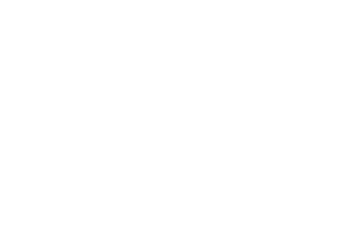

In [28]:
for path in tqdm(all_train_videos):
    file_name = path.split('/')[-1]
    print(path)
    print(file_name)
    faces = detection_pipeline(path)
    """
    if distances is None:
        continue
    for distance in distances:
        row = [
            file_name,
            distance,
            1 if metadata[file_name]['label'] == 'FAKE' else 0
        ]
        # Append a new row at the end of the data frame
        df.loc[len(df)] = row
    """

In [30]:
    print(len(faces))
    distances = process_faces(faces, feature_extractor)

5


NameError: name 'process_faces' is not defined